<a href="https://colab.research.google.com/github/kenttw/kent-ai-learning-notebook/blob/master/Machine_Learning_Exercise/CreditCard/SimpleModel_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("./data/train.csv")

In [3]:
train.describe()

,acqic,bacno,cano,conam,contp,csmcu,etymd,fraud_ind,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey
count,1.141340e+06,1.141340e+06,1.141340e+06,1.141340e+06,1.141340e+06,1.141340e+06,1.141340e+06,1.141340e+06,1.141340e+06,1.141340e+06,1.141340e+06,1.141340e+06,1.141340e+06,1.141340e+06,1.141340e+06,1.141340e+06,1.141340e+06,1.141340e+06
mean,6.006358e+03,8.207719e+04,1.089379e+05,6.546797e+02,4.829436e+00,5.382622e+01,4.149955e+00,1.339040e-02,4.747995e+00,4.959784e-02,4.529871e+01,1.462972e+05,2.978248e+02,5.589110e+04,4.755236e+03,9.565174e+01,2.491457e-02,9.713231e+05
std,1.504925e+03,4.738710e+04,6.092417e+04,4.030133e+02,6.515574e-01,2.072867e+01,2.394154e+00,1.149396e-01,1.114225e+00,3.652489e-01,2.602185e+01,5.213356e+04,7.796604e+01,3.083730e+04,1.979464e+03,1.889329e+01,2.219759e-01,5.641638e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.135200e+04,5.765300e+04,4.364800e+02,5.000000e+00,6.200000e+01,2.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,2.300000e+01,1.109290e+05,2.500000e+02,3.374000e+04,3.802000e+03,1.020000e+02,0.000000e+00,4.872235e+05
50%,6.708000e+03,8.184400e+04,1.097910e+05,5.919000e+02,5.000000e+00,6.200000e+01,4.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,4.500000e+01,1.515090e+05,2.640000e+02,5.933300e+04,5.817000e+03,1.020000e+02,0.000000e+00,9.797315e+05
75%,6.769000e+03,1.230940e+05,1.619220e+05,8.075300e+02,5.000000e+00,6.200000e+01,5.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,6.800000e+01,1.858180e+05,3.430000e+02,7.920000e+04,5.817000e+03,1.020000e+02,0.000000e+00,1.455292e+06
max,6.884000e+03,1.638840e+05,2.133340e+05,7.208770e+03,6.000000e+00,7.500000e+01,1.000000e+01,1.000000e+00,9.000000e+00,8.000000e+00,9.000000e+01,2.359590e+05,4.590000e+02,1.033070e+05,6.671000e+03,1.070000e+02,4.000000e+00,1.958239e+06


# Down Sampling

In [4]:
train_1 = train[train.fraud_ind == 1]

In [5]:
train_1.describe()

,acqic,bacno,cano,conam,contp,csmcu,etymd,fraud_ind,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey
count,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.0,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,1.528300e+04
mean,4932.146372,82289.184715,110977.883727,713.072810,4.960479,56.162534,5.529543,1.0,4.999804,0.003795,42.565203,127180.714650,295.414971,52568.312504,4281.161290,69.454492,0.549499,1.139781e+06
std,1543.648162,47434.813896,60659.156165,564.219474,0.202091,15.948025,2.948289,0.0,0.244425,0.089268,23.470492,73487.290342,68.640865,18025.286212,2348.617285,31.590302,0.892072,5.668092e+05
min,0.000000,2.000000,23.000000,0.000000,2.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.587400e+04
25%,3348.000000,40187.500000,60927.000000,223.110000,5.000000,61.000000,2.000000,1.0,5.000000,0.000000,25.000000,60608.000000,263.000000,51293.000000,1803.000000,38.000000,0.000000,6.960135e+05
50%,5720.000000,83082.000000,112170.000000,696.350000,5.000000,61.000000,8.000000,1.0,5.000000,0.000000,40.000000,140138.000000,289.000000,54828.000000,5320.000000,75.000000,0.000000,7.519770e+05
75%,6331.000000,123112.000000,164717.000000,1016.340000,5.000000,62.000000,8.000000,1.0,5.000000,0.000000,60.000000,192036.500000,360.000000,59578.000000,6580.000000,104.000000,2.000000,1.859624e+06
max,6883.000000,163854.000000,212152.000000,3353.250000,6.000000,75.000000,9.000000,1.0,7.000000,4.000000,90.000000,235959.000000,458.000000,103304.000000,6665.000000,106.000000,2.000000,1.957940e+06


In [6]:
train_0 = train[train.fraud_ind == 0]

In [7]:
train_0_sample = train_0.sample(len(train_1), random_state=111)

In [8]:
train_0_sample.describe()

,acqic,bacno,cano,conam,contp,csmcu,etymd,fraud_ind,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey
count,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.0,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,1.528300e+04
mean,6013.472093,80931.396912,109521.897271,651.599413,4.828502,53.669698,4.119806,0.0,4.743637,0.049663,45.138585,146627.723353,298.112347,55879.644311,4752.388994,96.038278,0.018452,9.714091e+05
std,1507.026572,46915.319661,60775.439365,399.350454,0.657450,20.894367,2.381625,0.0,1.118592,0.353651,26.044660,51603.676954,78.044001,31072.666023,1984.794603,18.463904,0.190536,5.630901e+05
min,0.000000,2.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.970000e+02
25%,5982.000000,41226.500000,58858.500000,432.400000,5.000000,62.000000,2.000000,0.0,5.000000,0.000000,22.000000,110548.000000,250.000000,32216.000000,4042.000000,102.000000,0.000000,4.853675e+05
50%,6716.000000,80006.000000,109796.000000,585.920000,5.000000,62.000000,4.000000,0.0,5.000000,0.000000,45.000000,151317.000000,264.000000,59360.000000,5817.000000,102.000000,0.000000,9.887370e+05
75%,6769.000000,121482.500000,162938.500000,802.730000,5.000000,62.000000,5.000000,0.0,5.000000,0.000000,68.000000,185915.500000,343.000000,79250.000000,5817.000000,102.000000,0.000000,1.453432e+06
max,6883.000000,163883.000000,213334.000000,4683.260000,6.000000,75.000000,9.000000,0.0,9.000000,8.000000,90.000000,235959.000000,459.000000,103306.000000,6652.000000,106.000000,2.000000,1.958239e+06


In [9]:
train_down_sample = pd.concat([train_0_sample,train_1])

In [10]:
train_down_sample = train_down_sample.set_index("txkey")

In [11]:
train_down_sample.head(2)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd
txkey,,,,,,,,,,,,,,,,,,,,,
528820,6881,147091,181016,513.8,5,0,N,0,N,N,...,N,0,44,212400.0,457,69007,N,0,102,0
1737750,6767,96505,119945,1011.5,5,62,N,5,N,N,...,N,0,77,183520.0,292,12739,N,5817,102,0


# Split to X and y

In [13]:
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score
import os
from random import random, randint
from mlflow import log_metric, log_param, log_artifacts
import mlflow


In [14]:
df_y = train_down_sample['fraud_ind']

In [15]:
df_y.describe()

count    30566.000000
mean         0.500000
std          0.500008
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: fraud_ind, dtype: float64

In [16]:
del train_down_sample['fraud_ind']

In [17]:
df_X = train_down_sample

In [18]:
df_X.describe()

,acqic,bacno,cano,conam,contp,csmcu,etymd,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd
count,30566.000000,30566.000000,30566.000000,30566.000000,30566.000000,30566.000000,30566.000000,30566.000000,30566.000000,30566.000000,30566.000000,30566.000000,30566.000000,30566.000000,30566.000000,30566.000000
mean,5472.809232,81610.290813,110249.890499,682.336111,4.894491,54.916116,4.824674,4.871720,0.026729,43.851894,136904.219002,296.763659,54223.978407,4516.775142,82.746385,0.283976
std,1618.406355,47179.895001,60720.696677,489.743973,0.490803,18.627918,2.771082,0.819683,0.258926,24.823974,64234.557554,73.504147,25454.488175,2187.022499,29.087622,0.697524
min,0.000000,2.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,3348.000000,40771.750000,59749.250000,363.990000,5.000000,61.000000,2.000000,5.000000,0.000000,24.000000,95603.250000,251.000000,41752.250000,3460.000000,46.000000,0.000000
50%,6215.000000,81166.500000,111007.500000,628.810000,5.000000,62.000000,5.000000,5.000000,0.000000,42.000000,144519.500000,288.000000,54828.000000,5817.000000,102.000000,0.000000
75%,6716.000000,122280.000000,163879.000000,944.630000,5.000000,62.000000,8.000000,5.000000,0.000000,64.000000,190815.000000,343.000000,72070.000000,5858.000000,102.000000,0.000000
max,6883.000000,163883.000000,213334.000000,4683.260000,6.000000,75.000000,9.000000,9.000000,8.000000,90.000000,235959.000000,459.000000,103306.000000,6665.000000,106.000000,2.000000


# Build Model

In [19]:
import lightgbm as lgb


In [25]:
from sklearn.model_selection import train_test_split
df_X_train, df_X_val = train_test_split(df_X, test_size=0.25, random_state=42)


In [28]:
df_y_train = df_y.loc[df_X_train.index]
df_y_val = df_y.loc[df_X_val.index]

In [27]:
 for cnam in ['ecfg', 'flbmk', 'flg_3dsmk', 'insfg', 'ovrlt']:
        df_X_train[cnam] = df_X_train[cnam].astype('category')
        df_X_val[cnam] = df_X_val[cnam].astype('category')


<ipython-input-27-71d6bfc8a9e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X_train[cnam] = df_X_train[cnam].astype('category')
<ipython-input-27-71d6bfc8a9e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X_val[cnam] = df_X_val[cnam].astype('category')


In [29]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(df_X_train, df_y_train)
lgb_eval = lgb.Dataset(df_X_val, df_y_val, reference=lgb_train)

In [30]:
# specify your configurations as a dict
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=10

print('Starting training...')

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=20)



Starting training...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11501, number of negative: 11423
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2081
[LightGBM] [Info] Number of data points in the train set: 22924, number of used features: 21
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501701 -> initscore=0.006805
[LightGBM] [Info] Start training from score 0.006805
[1]	valid_0's binary_logloss: 

/Users/kentshih/PycharmProjects/kent-ai-learning-notebook/venv/lib/python3.8/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/kentshih/PycharmProjects/kent-ai-learning-notebook/venv/lib/python3.8/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[2]	valid_0's binary_logloss: 0.650686
[3]	valid_0's binary_logloss: 0.631227
[4]	valid_0's binary_logloss: 0.612787
[5]	valid_0's binary_logloss: 0.595338
[6]	valid_0's binary_logloss: 0.578794
[7]	valid_0's binary_logloss: 0.563256
[8]	valid_0's binary_logloss: 0.548376
[9]	valid_0's binary_logloss: 0.534341
[10]	valid_0's binary_logloss: 0.520924
[11]	valid_0's binary_logloss: 0.508221
[12]	valid_0's binary_logloss: 0.496089
[13]	valid_0's binary_logloss: 0.484574
[14]	valid_0's binary_logloss: 0.473569
[15]	valid_0's binary_logloss: 0.463129
[16]	valid_0's binary_logloss: 0.453109
[17]	valid_0's binary_logloss: 0.44358
[18]	valid_0's binary_logloss: 0.434481
[19]	valid_0's binary_logloss: 0.425731
[20]	valid_0's binary_logloss: 0.417389
Did not meet early stopping. Best iteration is:
[20]	valid_0's binary_logloss: 0.417389


# Validation with downsampleing data

In [84]:
print('Starting predicting...')
# predict
y_pred = gbm.predict(df_X_val, num_iteration=gbm.best_iteration)
# eval
print('auc:', roc_auc_score(df_y_val, y_pred))

Starting predicting...
auc: 0.9586805374791417


In [85]:
confusion_matrix(df_y_val, (y_pred > 0.5).astype(int))

array([[3477,  383],
       [ 202, 3580]])

In [86]:
tn, fp, fn, tp  = confusion_matrix(df_y_val, (y_pred > 0.5).astype(int)).ravel() 

In [87]:
tn, fp, fn, tp

(3477, 383, 202, 3580)

In [91]:
f1_score(df_y_val,y_pred > 0.5)

0.9244673983214978

# Testing : verify with real distribution data

In [49]:
test = pd.read_csv("./data/test.csv")

In [55]:
assert len(set(test.txkey).intersection(set(train.txkey)))==0

In [57]:
test = test.set_index("txkey")

In [62]:
test.fraud_ind.describe()

count    380447.000000
mean          0.013332
std           0.114691
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: fraud_ind, dtype: float64

In [64]:
y_test = test.fraud_ind
y_test.describe()

count    380447.000000
mean          0.013332
std           0.114691
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: fraud_ind, dtype: float64

In [65]:
del test['fraud_ind']

In [66]:
X_test = test

In [67]:
 for cnam in ['ecfg', 'flbmk', 'flg_3dsmk', 'insfg', 'ovrlt']:
        X_test[cnam] = X_test[cnam].astype('category')


In [92]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)


In [93]:
print('auc:', roc_auc_score(y_test, y_pred))

auc: 0.9579652634431814


In [94]:
cm = confusion_matrix(y_test, (y_pred > 0.5).astype(int), labels=[0,1])
cm

array([[336497,  38878],
       [   287,   4785]])

In [95]:
th = .6
print("precision_score", precision_score(y_test,(y_pred > th).astype(int)))
print("recall_score",    recall_score(y_test,(y_pred > th).astype(int)))
print("f1_score",        f1_score(y_test,(y_pred > th).astype(int)))

precision_score 0.13012512568428108
recall_score 0.9185725552050473
f1_score 0.22795772580487325


In [96]:
fnscore =  [ (fname,socre) for fname,socre in zip(gbm.feature_name(),gbm.feature_importance())]

In [97]:
top_feature = sorted(fnscore, key=lambda tup: tup[1], reverse=True)[:25]
top_feature

[('mchno', 149),
 ('csmcu', 65),
 ('stocn', 54),
 ('conam', 50),
 ('mcc', 50),
 ('scity', 45),
 ('etymd', 40),
 ('stscd', 37),
 ('acqic', 32),
 ('loctm', 22),
 ('flg_3dsmk', 21),
 ('ecfg', 20),
 ('bacno', 12),
 ('locdt', 2),
 ('iterm', 1),
 ('cano', 0),
 ('contp', 0),
 ('flbmk', 0),
 ('hcefg', 0),
 ('insfg', 0),
 ('ovrlt', 0)]

# Lift

In [75]:
import lift

In [76]:
import numpy as np



In [77]:
y_test.to_numpy().shape

(380447,)

In [78]:
 y_pred.reshape([-1,1]).shape

(380447, 1)

In [79]:
y_pred

array([0.28552029, 0.28552029, 0.28552029, ..., 0.28552029, 0.291115  ,
       0.28552029])

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

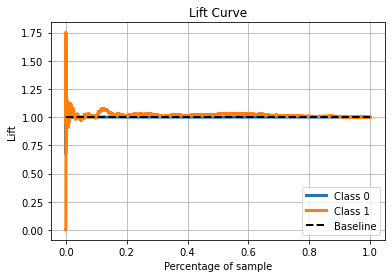

In [80]:
import scikitplot as skplt
skplt.metrics.plot_lift_curve(y_test.to_numpy(),np.vstack([y_pred, y_pred-1]).reshape([-1,2]))
